In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 15.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
import numpy as np
import pandas as pd
import shutil

# Load a model
# model = YOLO("yolov8n.pt")  #  ---  detection
# model = YOLO("yolov8n-cls.pt")  #  --- classification
model = YOLO('yolov8n-seg.pt')  #  --- segmentation
# model = YOLO('yolov8n-pose.pt') #  --- Pose / keypoint detection

# model = YOLO('yolov8n-seg.yaml')

100%|██████████| 6.73M/6.73M [00:00<00:00, 294MB/s]


In [ ]:
!unzip '/content/drive/MyDrive/CV Course/DATA/YOLO_MASK_SEGMENTATION/Pothole segmentation yolov8.zip'

In [5]:
results = model('/content/test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg')


image 1/1 /content/test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg: 640x640 1 person, 12.1ms
Speed: 7.1ms preprocess, 12.1ms inference, 682.1ms postprocess per image at shape (1, 3, 640, 640)


array([[[ 52,  83,  56],
        [ 38,  69,  42],
        [ 24,  54,  29],
        ...,
        [ 26,  59,  32],
        [ 16,  46,  21],
        [ 13,  43,  18]],

       [[ 45,  76,  49],
        [ 29,  60,  33],
        [ 17,  47,  22],
        ...,
        [ 24,  57,  30],
        [ 16,  46,  21],
        [ 14,  44,  19]],

       [[ 35,  66,  39],
        [ 17,  48,  21],
        [  9,  39,  14],
        ...,
        [ 21,  56,  29],
        [ 17,  50,  23],
        [ 14,  47,  20]],

       ...,

       [[ 98, 117, 120],
        [101, 120, 123],
        [ 95, 114, 117],
        ...,
        [  7,  19,  21],
        [  2,  14,  20],
        [ 24,  36,  42]],

       [[ 95, 114, 117],
        [ 96, 115, 118],
        [ 90, 109, 112],
        ...,
        [ 18,  30,  32],
        [ 27,  39,  45],
        [ 29,  41,  47]],

       [[ 96, 115, 118],
        [ 96, 115, 118],
        [ 90, 109, 112],
        ...,
        [ 18,  30,  32],
        [ 33,  45,  51],
        [ 29,  41,  47]]], dtype=uint8)
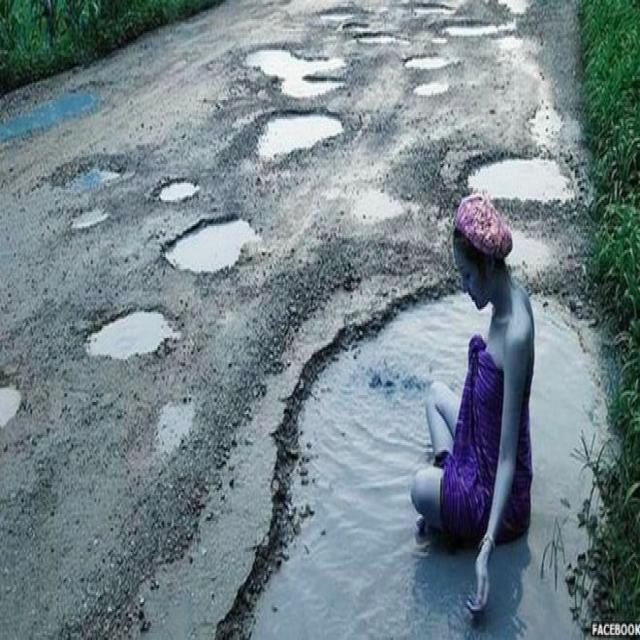

In [10]:
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/test/images/10_jpg.rf.bd9d6d969e2b1e8ef9497fc840ea17eb.jpg')
img

In [12]:
# Use the model

results = model.train(data='/content/drive/MyDrive/CV Course/DATA/YOLO_MASK_SEGMENTATION/config.yaml', epochs=100, imgsz=64)  # train the model

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/CV Course/DATA/YOLO_MASK_SEGMENTATION/config.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /content/train/labels.cache... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 124 images, 2 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.656G      4.151      4.336      2.828      2.288         31         64: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        124        573     0.0127     0.0873     0.0264     0.0104     0.0129      0.089     0.0183     0.0066



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.656G       3.69      4.448      2.217      2.023         33         64: 100%|██████████| 27/27 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        124        573       0.22     0.0925      0.066     0.0264      0.205     0.0855     0.0532     0.0157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.659G      3.191      4.233      1.874      1.751         49         64: 100%|██████████| 27/27 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        124        573      0.245      0.112     0.0812       0.03      0.246      0.105     0.0793     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.659G      2.825      3.859      1.606      1.583         40         64: 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        124        573      0.237      0.126     0.0786     0.0281      0.195      0.133     0.0674     0.0192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.656G      2.788      3.884      1.574      1.531         69         64:  33%|███▎      | 9/27 [00:03<00:07,  2.57it/s]


KeyboardInterrupt: 


0: 640x640 8 potholes, 21.3ms
Speed: 3.7ms preprocess, 21.3ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


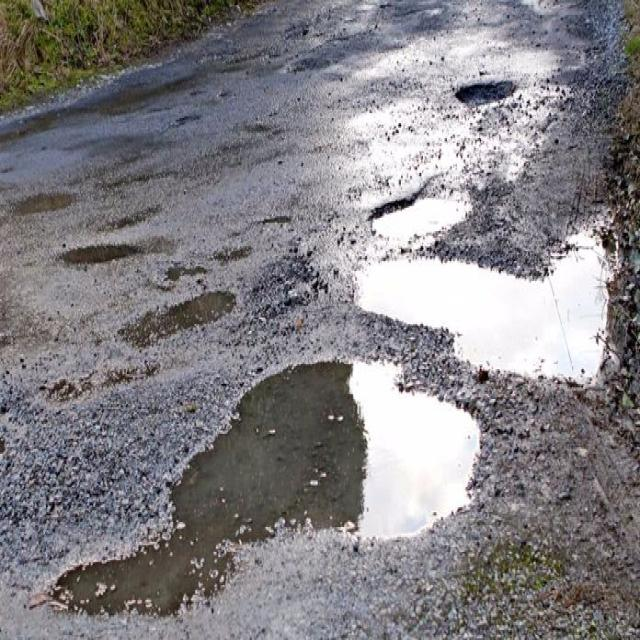

In [14]:

model_path = '/content/drive/MyDrive/CV Course/code files/ImageSegmentationYOLOv8/segment/train2/weights/best.pt'
image_path ='/content/test/images/433_jpg.rf.05116ea0d7e035f4aa1a41a84ddd122e.jpg'
img=cv2.imread(image_path)

H,W,_=img.shape

model = YOLO(model_path)
results = model(img)
cv2_imshow(img)

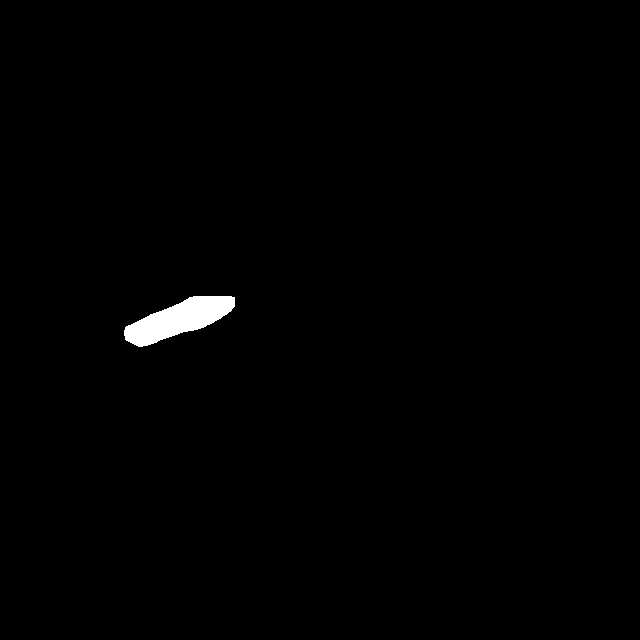

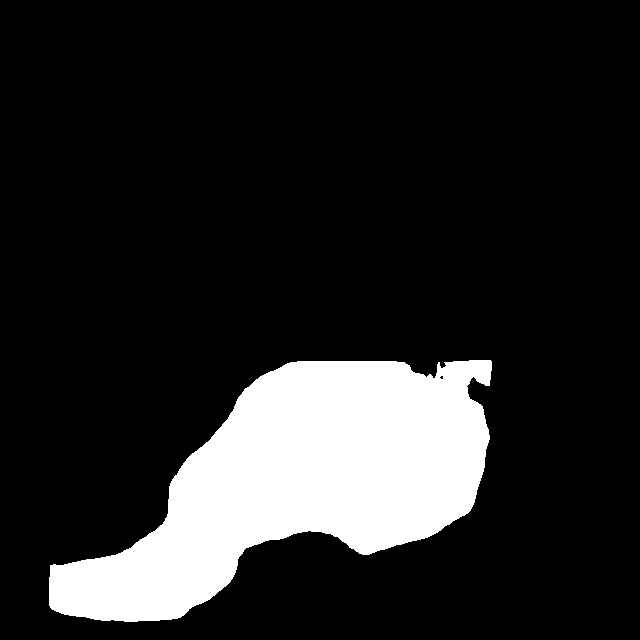

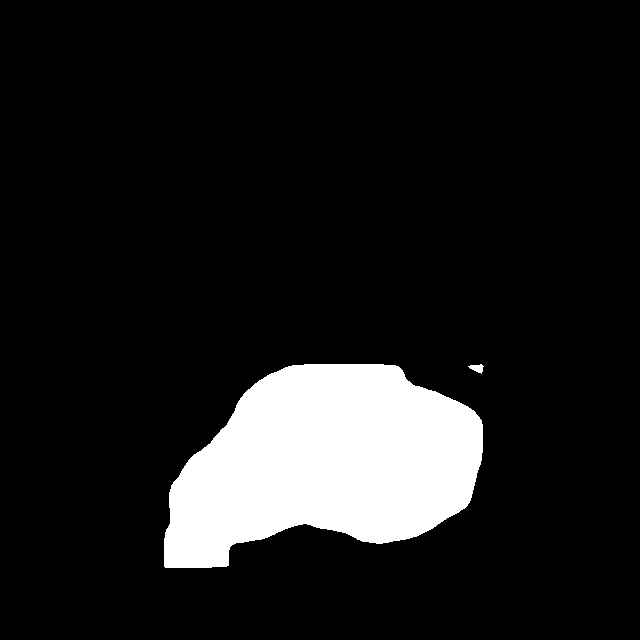

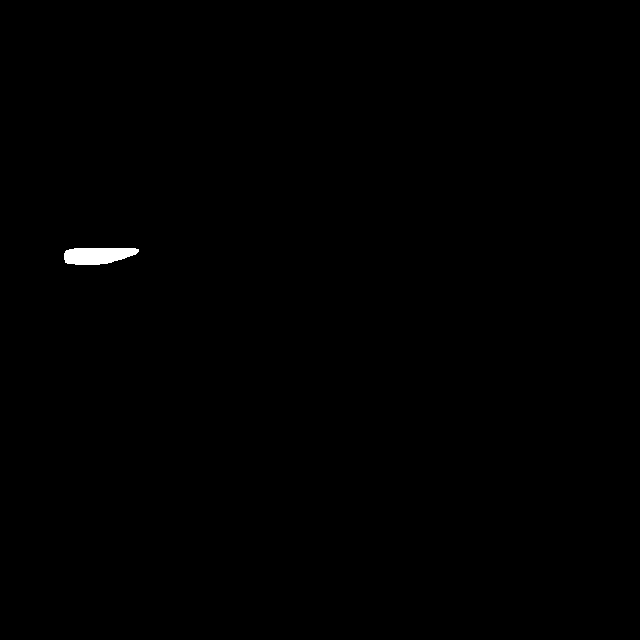

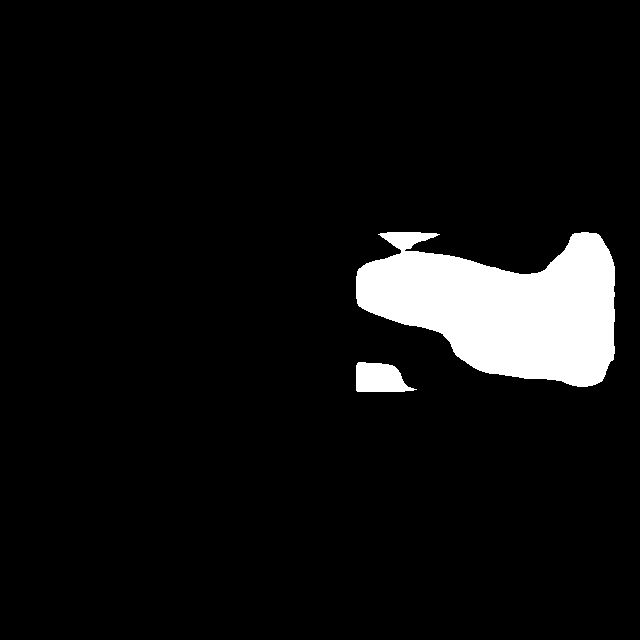

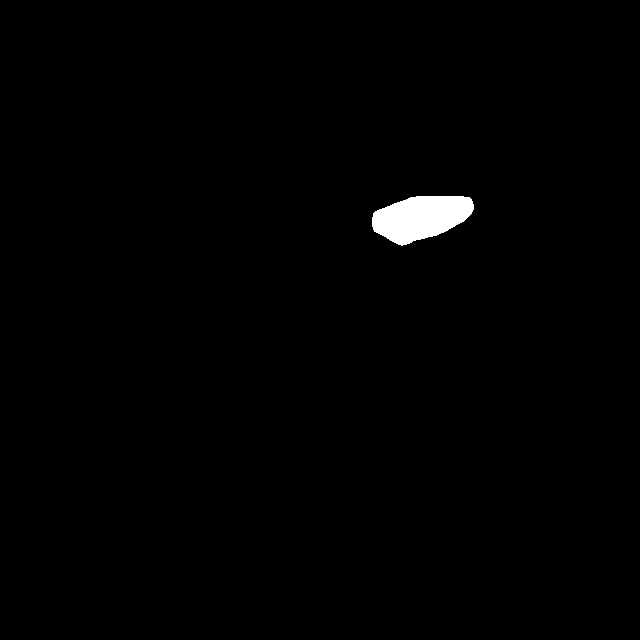

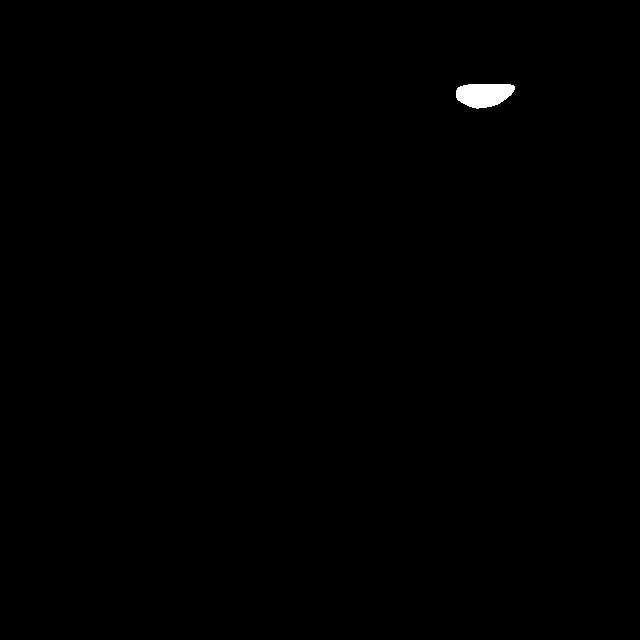

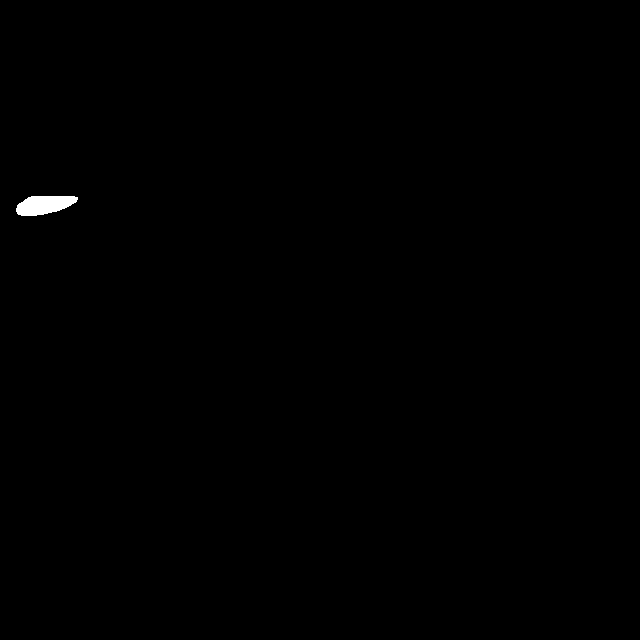

In [16]:
for result in results:
  for j, mask in enumerate(result.masks.data):
    mask = mask.cpu().numpy()*255
    mask=cv2.resize(mask,(W,H))
    cv2_imshow(mask)